<a href="https://colab.research.google.com/github/Ankita6332/2248436_Assessment/blob/main/2248436_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
#Importing essential libraries and modules for natural language processing (NLP) and machine learning tasks.
#importing specific functions and classes required for text processing, data manipulation, and neural network development.

import os
import re
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from keras.layers import LSTM
from wordcloud import WordCloud
from nltk.corpus import stopwords
from keras.layers import Embedding
from keras.models import Sequential
from keras.layers import Bidirectional
from nltk.tokenize import word_tokenize
from keras.layers import Dense, Dropout
from nltk.stem import WordNetLemmatizer
from sklearn.impute import SimpleImputer
from keras.layers import GlobalAvgPool1D
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [94]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [95]:
#loading data
dataset = pd.read_csv("/content/Womens Clothing E-Commerce Reviews.csv")
df = pd.DataFrame(dataset)
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [96]:
#dropping first column
df = df.drop(df.columns[0], axis=1)

In [97]:
#sum of null values
print(df.isnull().sum())

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64


In [98]:
# Filling missing values in specific columns with the mode (most frequent value) of each respective column.

df['Division Name'].fillna(df['Division Name'].mode(), inplace=True)
df['Department Name'].fillna(df['Department Name'].mode(), inplace=True)
df['Class Name'].fillna(df['Class Name'].mode(), inplace=True)

In [99]:
# Impute missing values in 'Review Text' using the most frequent value.
# Replace any remaining missing values with 'No review.'

imputer = SimpleImputer(strategy='most_frequent')
df['Review Text'].fillna('No review', inplace=True)

In [100]:
#Drop missing values in Title column
df.dropna(subset=['Title'], inplace=True)

In [101]:
df.head(20)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses
10,1077,53,Dress looks like it's made of cheap material,Dress runs small esp where the zipper area run...,3,0,14,General,Dresses,Dresses
12,1095,53,Perfect!!!,More and more i find myself reliant on the rev...,5,1,2,General Petite,Dresses,Dresses


In [102]:
# Lower Character all the Texts
df['Review Text'] = df['Review Text'].str.lower()
df['Review Text'].head()

2    i had such high hopes for this dress and reall...
3    i love, love, love this jumpsuit. it's fun, fl...
4    this shirt is very flattering to all due to th...
5    i love tracy reese dresses, but this one is no...
6    i aded this in my basket at hte last mintue to...
Name: Review Text, dtype: object

In [103]:
# Removing Punctuations and Numbers from the Text
def remove_punctuations_numbers(inputs):
    return re.sub(r'[^a-zA-Z]', ' ', inputs)
df['Review Text'] = df['Review Text'].apply(remove_punctuations_numbers)

In [104]:
# Defining a tokenization function using NLTK's word_tokenize.
# Applying tokenization to the 'Review Text' column and creating a new 'text_tokenized' column.

def tokenization(inputs):
    return word_tokenize(inputs)
df['text_tokenized'] = df['Review Text'].apply(tokenization)
df['text_tokenized'].head()

2    [i, had, such, high, hopes, for, this, dress, ...
3    [i, love, love, love, this, jumpsuit, it, s, f...
4    [this, shirt, is, very, flattering, to, all, d...
5    [i, love, tracy, reese, dresses, but, this, on...
6    [i, aded, this, in, my, basket, at, hte, last,...
Name: text_tokenized, dtype: object

In [105]:
# Creating a set of English stopwords and excluding 'not'.
# Removing stopwords from the tokenized text in the 'text_tokenized' column, resulting in the 'text_stop' column.

stop_words = set(stopwords.words('english'))
stop_words.remove('not')


def stopwords_remove(inputs):  # Ref.2
    return [k for k in inputs if k not in stop_words]


df['text_stop'] = df['text_tokenized'].apply(stopwords_remove)
df['text_stop'].head()

2    [high, hopes, dress, really, wanted, work, ini...
3    [love, love, love, jumpsuit, fun, flirty, fabu...
4    [shirt, flattering, due, adjustable, front, ti...
5    [love, tracy, reese, dresses, one, not, petite...
6    [aded, basket, hte, last, mintue, see, would, ...
Name: text_stop, dtype: object

In [106]:
# Creating a lemmatizer object using WordNet and specifying the part of speech ('v' for verb).
# Applying lemmatization to the 'text_stop' column, resulting in the 'text_lemmatized' column.

lemmatizer = WordNetLemmatizer()
def lemmatization(inputs):  # Ref.1
    return [lemmatizer.lemmatize(word=kk, pos='v') for kk in inputs]

df['text_lemmatized'] = df['text_stop'].apply(lemmatization)
df['text_lemmatized'].head()

2    [high, hop, dress, really, want, work, initial...
3    [love, love, love, jumpsuit, fun, flirty, fabu...
4    [shirt, flatter, due, adjustable, front, tie, ...
5    [love, tracy, reese, dress, one, not, petite, ...
6    [aded, basket, hte, last, mintue, see, would, ...
Name: text_lemmatized, dtype: object

In [107]:
# Removing Words less than length 2
def remove_less_than_2(inputs):  # Ref.1
    return [j for j in inputs if len(j) > 2]

df['final'] = df['text_lemmatized'].apply(remove_less_than_2)

In [108]:
# Joining Tokens into Sentences
df['final'] = df['final'].str.join(' ')
df['final'].head()

2    high hop dress really want work initially orde...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flatter due adjustable front tie perfect...
5    love tracy reese dress one not petite feet tal...
6    aded basket hte last mintue see would look lik...
Name: final, dtype: object

In [109]:
FreqOfWords = df['final'].str.split(expand=True).stack().value_counts()
FreqOfWords_top200 = FreqOfWords[:200]

fig = px.treemap(FreqOfWords_top200, path=[FreqOfWords_top200.index], values=0)
fig.update_layout(title_text='Top Frequent 200 Words in the Dataset',
                  title_x=0.5, title_font=dict(size=20)
                  )
fig.update_traces(textinfo="label+value")
fig.show()

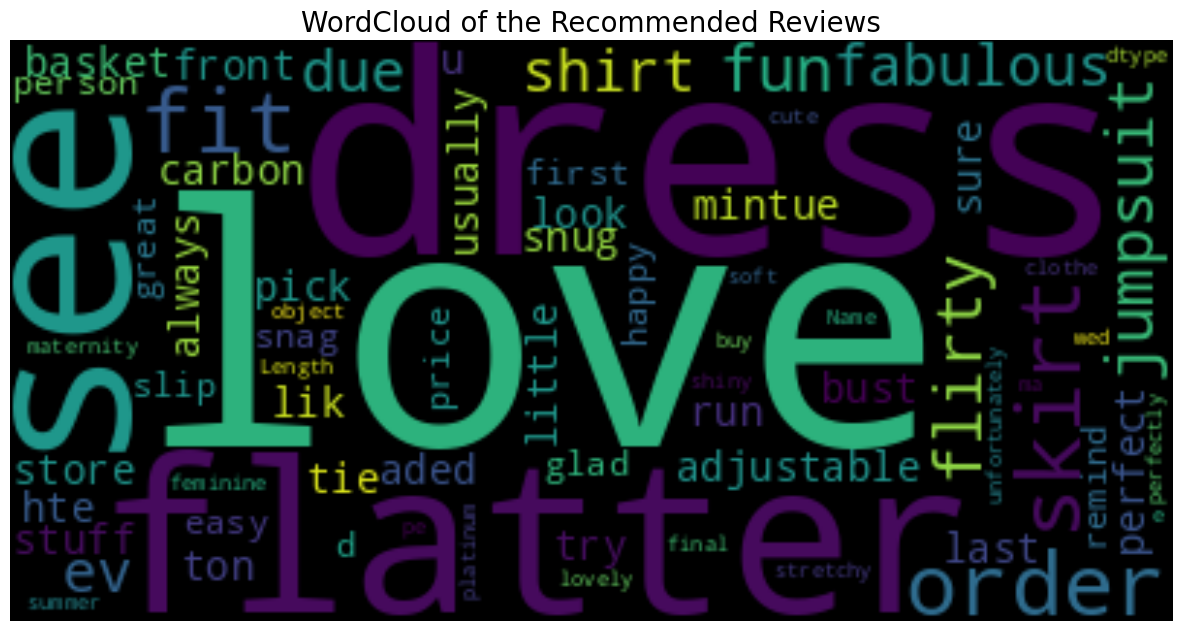

In [110]:
data_recommended = df[df['Recommended IND'] == 1]  # Dataframe that only includes recommended reviews
data_not_recommended = df[df['Recommended IND'] == 0]  # # Dataframe that only includes not recommended reviews

WordCloud_recommended = WordCloud(max_words=500,
                                  random_state=30,
                                  collocations=True).generate(str((data_recommended['final'])))

plt.figure(figsize=(15, 8))
plt.imshow(WordCloud_recommended, interpolation='bilinear')
plt.title('WordCloud of the Recommended Reviews', fontsize=20)
plt.axis("off")
plt.show()

In [111]:
FreqOfWords = data_recommended['final'].str.split(expand=True).stack().value_counts()
FreqOfWords_top200 = FreqOfWords[:200]

fig = px.treemap(FreqOfWords_top200, path=[FreqOfWords_top200.index], values=0)
fig.update_layout(title_text='Top Frequent 200 Words in the Recommended Reviews',
                  title_x=0.5, title_font=dict(size=20)
                  )
fig.update_traces(textinfo="label+value")
fig.show()

In [112]:
df['length_of_text'] = [len(i.split(' ')) for i in df['final']]
fig = px.histogram(df['length_of_text'], marginal='box',
                   labels={"value": "Length of the Text",
                           "color": 'Recommended?'},
                   color=df['Recommended IND'])

fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Distribution of the Length of the Texts after Cleaning',
                  title_x=0.5, title_font=dict(size=20))
fig.update_layout(barmode='overlay')
fig.show()

In [113]:
labels = ['Recommended', 'Not Recommended']
values = [df[df['Recommended IND'] == 1]['Recommended IND'].value_counts()[1],
          df[df['Recommended IND'] == 0]['Recommended IND'].value_counts()[0]]
colors = ['green', 'red']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, opacity=0.8)])
fig.update_traces(textinfo='percent+label', marker=dict(line=dict(color='#000000', width=2), colors=colors))
fig.update_layout(title_text='Distribution of the Recommendations', title_x=0.5, title_font=dict(size=20))
fig.show()

In [114]:
fig = px.histogram(df['Rating'],
                   labels={'value': 'Rating',
                           'count': 'Frequency',
                           'color': 'Rating'}, color=df['Rating'])
fig.update_layout(bargap=0.2)
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Distribution of the Ratings',
                  title_x=0.5, title_font=dict(size=20))
fig.show()

In [115]:
fig = px.histogram(df['Age'], marginal='box',
                   labels={'value': 'Age'})

fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Distribution of the Age of the Customers',
                  title_x=0.5, title_font=dict(size=20))
fig.show()

In [116]:
fig = px.histogram(df['Rating'], color=df['Department Name'],
                   labels={'value': 'Rating',
                           'color': 'Department Name'})
fig.update_layout(bargap=0.2)
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Relationship between Ratings and Departments',
                  title_x=0.5, title_font=dict(size=20))
fig.update_layout(barmode='group')
fig.show()

In [117]:
#use Text data to predict Recommendation
y = df['Recommended IND']
X = df['final']

X.head()

2    high hop dress really want work initially orde...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flatter due adjustable front tie perfect...
5    love tracy reese dress one not petite feet tal...
6    aded basket hte last mintue see would look lik...
Name: final, dtype: object

In [137]:
# Train-Test-Validation Split
#x, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=13)  # Test: %20

X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.25, random_state=13)  # Val: %20

print('Shape of the X_train:', X_train.shape)
#print('Shape of the X_test:', X_test.shape)
print('Shape of the X_val:', X_val.shape)
print('--'*20)
print('Shape of the y_train:', y_train.shape)
#print('Shape of the y_test:', y_test.shape)
print('Shape of the y_val:', y_val.shape)

Shape of the X_train: (11805,)
Shape of the X_val: (3935,)
----------------------------------------
Shape of the y_train: (11805,)
Shape of the y_val: (3935,)


In [121]:
# Initializing a tokenizer with a specified maximum number of words and an out-of-vocabulary token.
# Fitting the tokenizer on the training data and transforming text data into tokenized sequences.
# Displaying examples of non-tokenized and tokenized text for two different samples from the training data.

num_words = 10000
tokenizer = Tokenizer(num_words=num_words, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

Tokenized_train = tokenizer.texts_to_sequences(X_train)
Tokenized_val = tokenizer.texts_to_sequences(X_val)


print('Non-tokenized Version: ', X_train.iloc[0])
print('Tokenized Version: ', tokenizer.texts_to_sequences([X_train.iloc[0]]))
print('--'*20)
print('Non-tokenized Version: ', X_train.iloc[80])
print('Tokenized Version: ', tokenizer.texts_to_sequences([X_train.iloc[80]]))

Non-tokenized Version:  love jeans fit great causal dressy appreciate wear flats boot heel worth cash
Tokenized Version:  [[6, 47, 3, 12, 1723, 504, 785, 5, 459, 204, 297, 218, 3035]]
----------------------------------------
Non-tokenized Version:  order dress petite arrive regular rest fit meantime petites run size dress long beautiful get shorten fabric lovely blonde green nice hair good thing since colour totally sell try not miss lovely purchase
Tokenized Version:  [[14, 2, 45, 286, 124, 657, 3, 3987, 727, 32, 4, 2, 46, 38, 15, 1028, 16, 132, 1910, 159, 31, 954, 64, 255, 148, 1674, 429, 264, 22, 7, 620, 132, 49]]


In [122]:
# Padding the tokenized training and validation sequences to a maximum length of 50 tokens with padding added to the beginning.
# Resulting in 'Padded_train' and 'Padded_val' sequences.

maxlen = 50
Padded_train = pad_sequences(Tokenized_train, maxlen=maxlen, padding='pre')
Padded_val = pad_sequences(Tokenized_val, maxlen=maxlen, padding='pre')

In [123]:
# Creating the Model
model = Sequential()

model.add(Embedding(num_words, 16, input_length=maxlen))
model.add(Dropout(0.2))

model.add(GlobalAvgPool1D())
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

opt = tf.optimizers.Adam(lr=0.55e-3)  # Learning Rate

model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 16)            160000    
                                                                 
 dropout_2 (Dropout)         (None, 50, 16)            0         
                                                                 
 global_average_pooling1d_1  (None, 16)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160017 (625.07 KB)
Trainable params: 160017 (625.07 KB)
Non-trainable params: 0 (0.00 Byte)
______________

In [124]:
# Training the Model
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='auto', patience=5,
                                                  restore_best_weights=True)

epochs = 100
hist = model.fit(Padded_train, y_train, epochs=epochs,
                 validation_data=(Padded_val, y_val),
                 callbacks=[early_stopping], batch_size=32)

Epoch 1/100
462/462 [==============================] - 4s 7ms/step - loss: 0.5197 - accuracy: 0.8071 - val_loss: 0.4455 - val_accuracy: 0.8223
Epoch 2/100
462/462 [==============================] - 3s 6ms/step - loss: 0.4414 - accuracy: 0.8170 - val_loss: 0.4130 - val_accuracy: 0.8223
Epoch 3/100
462/462 [==============================] - 3s 6ms/step - loss: 0.4046 - accuracy: 0.8172 - val_loss: 0.3759 - val_accuracy: 0.8233
Epoch 4/100
462/462 [==============================] - 3s 6ms/step - loss: 0.3628 - accuracy: 0.8262 - val_loss: 0.3393 - val_accuracy: 0.8372
Epoch 5/100
462/462 [==============================] - 4s 8ms/step - loss: 0.3261 - accuracy: 0.8488 - val_loss: 0.3119 - val_accuracy: 0.8557
Epoch 6/100
462/462 [==============================] - 3s 6ms/step - loss: 0.2990 - accuracy: 0.8676 - val_loss: 0.2945 - val_accuracy: 0.8746
Epoch 7/100
462/462 [==============================] - 3s 6ms/step - loss: 0.2812 - accuracy: 0.8782 - val_loss: 0.2831 - val_accuracy: 0.8788

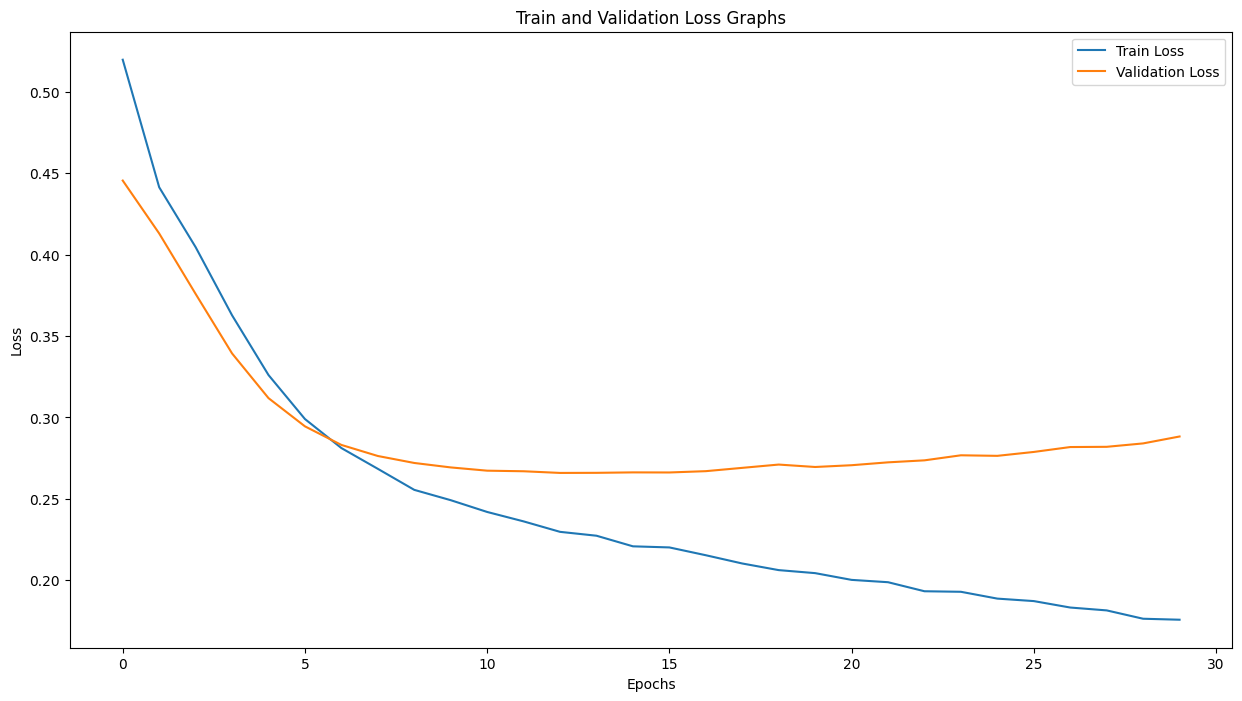

In [125]:
plt.figure(figsize=(15, 8))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Train and Validation Loss Graphs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

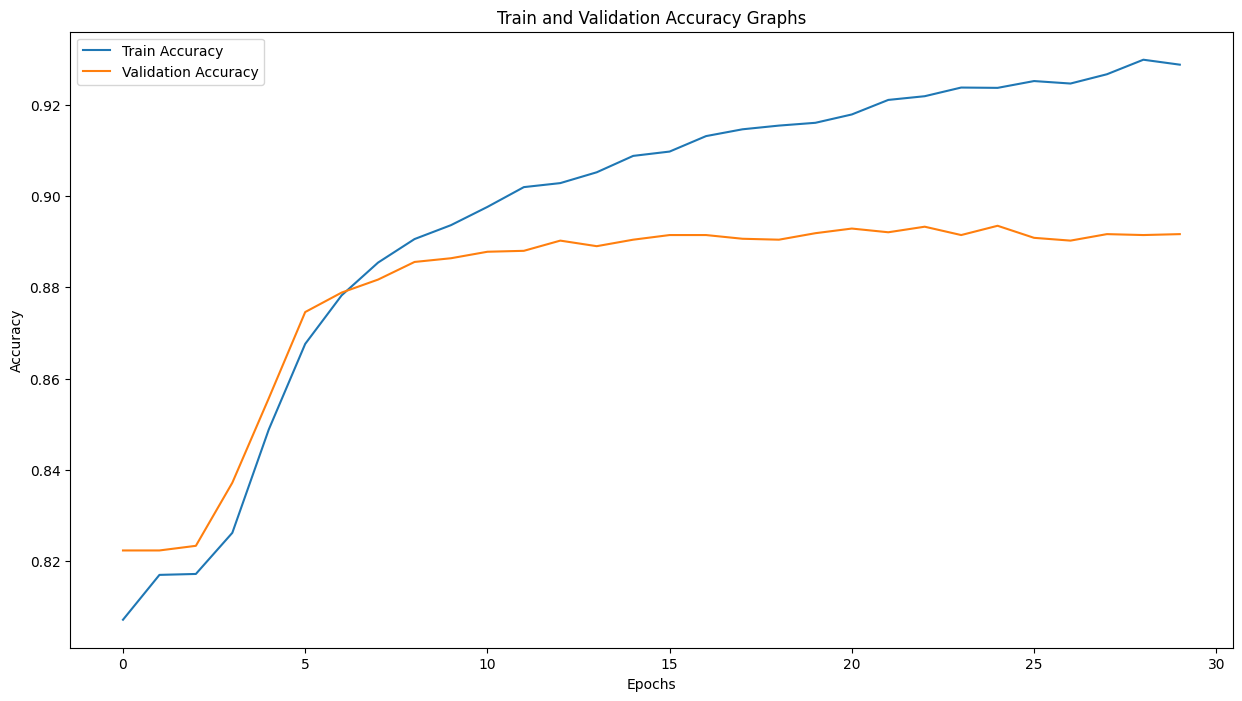

In [126]:
plt.figure(figsize=(15, 8))
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Train and Validation Accuracy Graphs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [127]:
# Tokenizing, removing stopwords, and lemmatizing the text data in the 'X_test' dataset.
# Joining the processed tokens back into sentences.
# Displaying the preprocessed text in the 'X_test' dataset.

X_test = X_test.apply(tokenization)
X_test = X_test.apply(stopwords_remove)
X_test = X_test.apply(lemmatization)
X_test = X_test.str.join(' ')

X_test.head()

6844     pretty summer top detail neckline add interest...
1924     pant flatter comfortable plus cute cute cute l...
12250    great piece use night gown sleep last night li...
3808     wow perfect sweater beautiful soft color light...
15875    order navy really stun way cream ask husband c...
Name: final, dtype: object

In [128]:
# Converting 'X_test' text data into tokenized sequences using the trained tokenizer.
# Padding the tokenized test sequences to a maximum length of 50 tokens with padding added to the beginning.
# Evaluating the model's performance on the preprocessed 'Padded_test' data with corresponding labels 'y_test.'

Tokenized_test = tokenizer.texts_to_sequences(X_test)
Padded_test = pad_sequences(Tokenized_test, maxlen=maxlen, padding='pre')

test_evaluate = model.evaluate(Padded_test, y_test)

123/123 [==============================] - 0s 2ms/step - loss: 0.2761 - accuracy: 0.8956


In [129]:
pred_train_lstm = model.predict(Padded_train)
pred_test_lstm = model.predict(Padded_test)

123/123 [==============================] - 0s 2ms/step


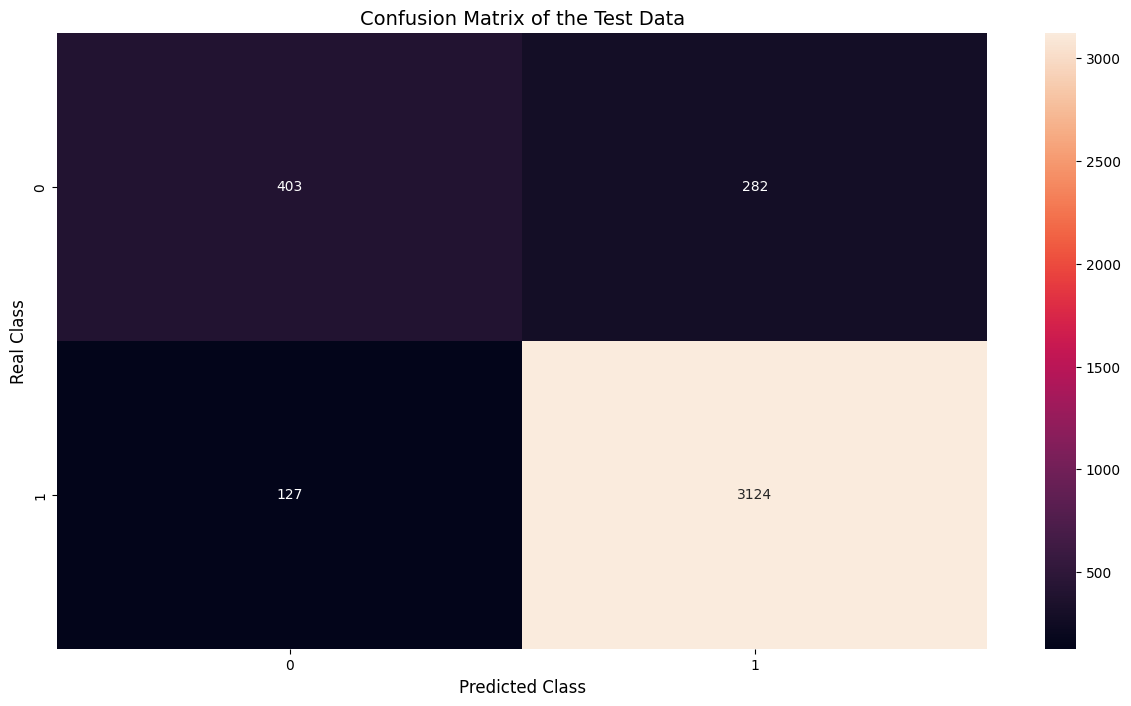

In [130]:
# Loop through predictions for the test data and adjust values based on a threshold.
# Loop through predictions for the training data and adjust values based on a threshold.
# Calculate the confusion matrix for the test data and create a heatmap visualization.

for i, x in enumerate(pred_test_lstm):
    if 0 <= x < 0.49:
        pred_test_lstm[i] = 0
    else:
        pred_test_lstm[i] = 1

for i, x in enumerate(pred_train_lstm):
    if 0 <= x < 0.49:
        pred_train_lstm[i] = 0
    else:
        pred_train_lstm[i] = 1

conf_mat = confusion_matrix(y_true=y_test, y_pred=pred_test_lstm)
plt.figure(figsize=(15, 8))
sns.heatmap(conf_mat, annot=True, fmt='g')
plt.title('Confusion Matrix of the Test Data', fontsize=14)
plt.ylabel('Real Class', fontsize=12)
plt.xlabel('Predicted Class', fontsize=12)
plt.show()

In [131]:
# Accuracy
train_acc_lstm = round(accuracy_score(y_train, pred_train_lstm) * 100, 2)
print('Train Accuracy of the LSTM: %', train_acc_lstm)
test_acc_lstm = round(accuracy_score(y_test, pred_test_lstm) * 100, 2)
print('Test Accuracy of the LSTM: %', test_acc_lstm)
print('--' * 20)

# Precision
train_precision_lstm = round(precision_score(y_train, pred_train_lstm) * 100, 2)
print('Train Precision of the LSTM: %', train_precision_lstm)
precision_lstm = round(precision_score(y_test, pred_test_lstm) * 100, 2)
print('Test Precision of the LSTM: %', precision_lstm)
print('--' * 20)

# Recall
train_recall_lstm = round(recall_score(y_train, pred_train_lstm) * 100, 2)
print('Train Recall of the LSTM: %', train_recall_lstm)
recall_lstm = round(recall_score(y_test, pred_test_lstm) * 100, 2)
print('Test Recall of the LSTM: %', recall_lstm)

Train Accuracy of the LSTM: % 92.92
Test Accuracy of the LSTM: % 89.61
----------------------------------------
Train Precision of the LSTM: % 94.61
Test Precision of the LSTM: % 91.72
----------------------------------------
Train Recall of the LSTM: % 96.85
Test Recall of the LSTM: % 96.09
